In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
incept = keras.applications.InceptionV3()

In [3]:
type(incept)

tensorflow.python.keras.engine.functional.Functional

In [4]:
incept.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
x = incept.layers[-2].output
output = Dense(units = 4, activation = 'softmax')(x)

In [6]:
model = Model(inputs = incept.input, outputs = output)

In [7]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
for layer in model.layers[:-25]:
    layer.trainable = False

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
train_path = 'datasets/Oranges/Train'
test_path = 'datasets/Oranges/Test'

In [11]:
train_datagen = ImageDataGenerator()
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=10)
test_datagen = ImageDataGenerator()
test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 321 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [12]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_batches, epochs = 10, verbose=1)

Epoch 1/10
33/33 [==============================] - 54s 2s/step - loss: 1.2506 - accuracy: 0.4424
Epoch 2/10
33/33 [==============================] - 57s 2s/step - loss: 0.9299 - accuracy: 0.6386
Epoch 3/10
33/33 [==============================] - 55s 2s/step - loss: 0.7610 - accuracy: 0.7788
Epoch 4/10
33/33 [==============================] - 57s 2s/step - loss: 0.6266 - accuracy: 0.8287
Epoch 5/10
33/33 [==============================] - 57s 2s/step - loss: 0.5367 - accuracy: 0.8910
Epoch 6/10
33/33 [==============================] - 56s 2s/step - loss: 0.4758 - accuracy: 0.8972
Epoch 7/10
33/33 [==============================] - 55s 2s/step - loss: 0.4110 - accuracy: 0.9097
Epoch 8/10
33/33 [==============================] - 55s 2s/step - loss: 0.3992 - accuracy: 0.9159
Epoch 9/10
33/33 [==============================] - 55s 2s/step - loss: 0.3143 - accuracy: 0.9564
Epoch 10/10
33/33 [==============================] - 56s 2s/step - loss: 0.3098 - accuracy: 0.9626


Text(0.5, 1.0, 'Training loss')

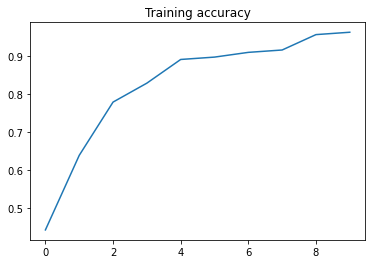

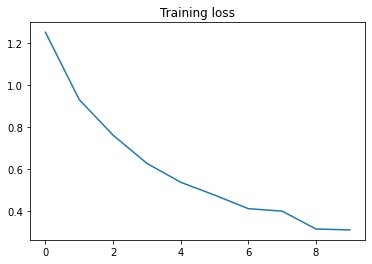

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.title ('Training accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.title('Training loss')

In [15]:
model.evaluate(test_batches, verbose =1)

8/8 [==============================] - 15s 2s/step - loss: 0.7385 - accuracy: 0.7375


[0.7384936213493347, 0.737500011920929]

In [16]:
predictions = model.predict(test_batches, verbose =0)

In [17]:
cm = confusion_matrix(test_batches.classes, np.argmax(predictions, axis=-1))

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
test_batches.class_indices

{'Keenu': 0, 'Mosumi': 1, 'Red blood': 2, 'Shakri': 3}

Confusion matrix, without normalization
[[17  1  2  0]
 [ 0 11  5  4]
 [ 0  1 18  1]
 [ 1  0  6 13]]


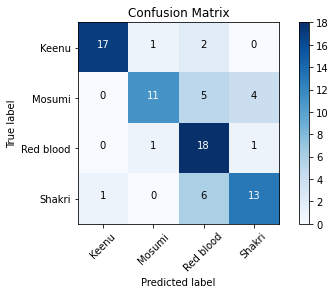

In [20]:
cm_plot_labels = ['Keenu', 'Mosumi', 'Red blood', 'Shakri']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')